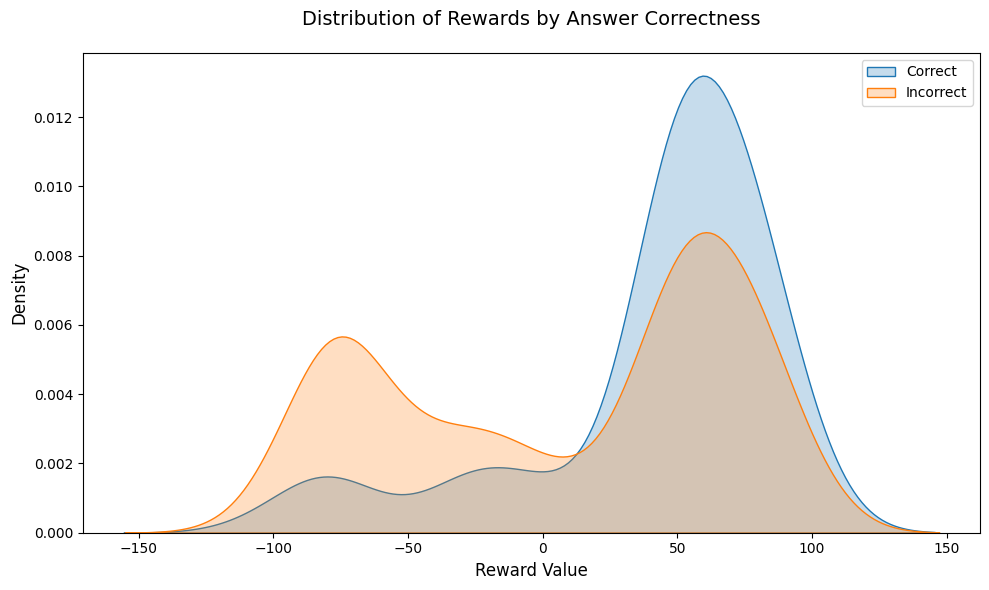

In [1]:
import json
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Get all JSON files in the specified directory
json_files = glob.glob('AIME-mcts-qwen-32b-base/jsons/*.json')

# Initialize lists to store the data
node_rewards = []

# Load each JSON file and extract the desired fields
for file_path in json_files:
    with open(file_path, 'r') as f:
        data = json.load(f)
        to_explore_reward = data.get('to_explore_reward', None)
        correct_answers = data.get('correct_answers', None)
        exclude = data.get('exclude', None)
        for answer, reward in to_explore_reward.items():
            if answer in exclude:
                continue
            if answer in correct_answers:
                node_rewards.append((True, reward))
            else:
                node_rewards.append((False, reward))
        
# Convert node_rewards into format for plotting
data = [(label, reward[0]) for label, reward in node_rewards]
df = pd.DataFrame(data, columns=['Correct', 'Reward'])

# Create boxplot using pandas/seaborn style
plt.figure(figsize=(10, 6), dpi=100)

# Create KDE plots for each category
sns.kdeplot(data=df[df['Correct'] == True]['Reward'], label='Correct', fill=True)
sns.kdeplot(data=df[df['Correct'] == False]['Reward'], label='Incorrect', fill=True)

plt.title('Distribution of Rewards by Answer Correctness', pad=20, fontsize=14)
plt.xlabel('Reward Value', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()




In [2]:
len(node_rewards)

152

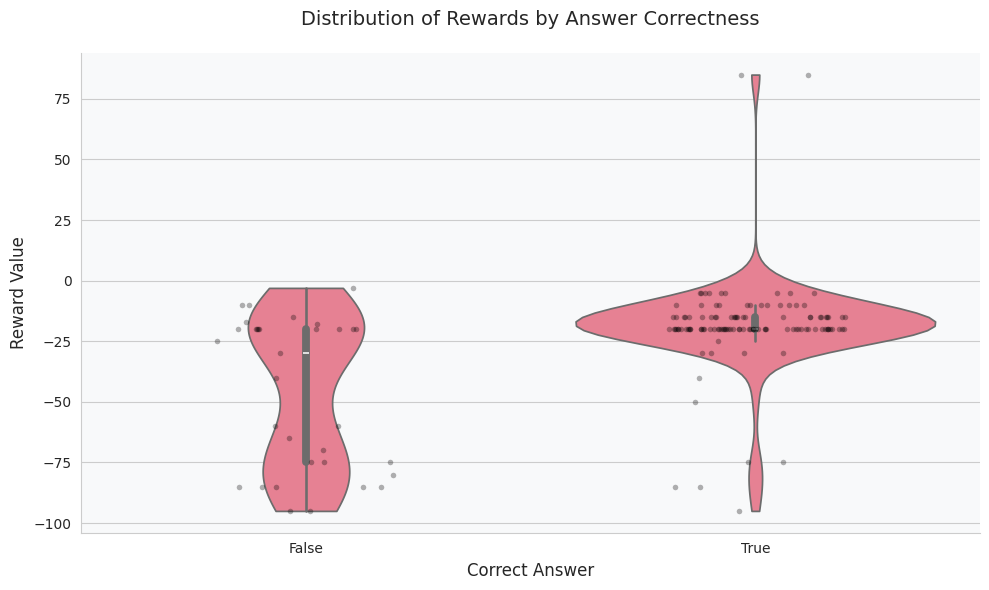


Statistics for True answers:
count    119.000000
mean     -18.445378
std       20.060796
min      -95.000000
25%      -20.000000
50%      -20.000000
75%      -15.000000
max       85.000000
Name: Reward, dtype: float64

Statistics for False answers:
count    33.000000
mean    -46.151515
std      31.254121
min     -95.000000
25%     -75.000000
50%     -30.000000
75%     -20.000000
max      -3.000000
Name: Reward, dtype: float64


In [3]:
import seaborn as sns
sns.set_style("whitegrid")  # Set a clean style
sns.set_palette("husl")     # Set a nice color palette

# Create a figure with larger size and higher DPI for better resolution
plt.figure(figsize=(10, 6), dpi=100)

# Create a violin plot with individual points overlaid
# Use jitter to spread out the points horizontally
ax = sns.violinplot(data=df, x='Correct', y='Reward', inner='box', cut=0)
sns.stripplot(data=df, x='Correct', y='Reward', color='black', alpha=0.3, size=4, jitter=0.2)

# Customize the plot
plt.title('Distribution of Rewards by Answer Correctness', pad=20, fontsize=14)
plt.xlabel('Correct Answer', fontsize=12)
plt.ylabel('Reward Value', fontsize=12)

# Adjust the plot style
ax.spines['top'].set_visible(False)    # Remove top border
ax.spines['right'].set_visible(False)  # Remove right border

# Optionally add a light background color
ax.set_facecolor('#f8f9fa')

plt.tight_layout()
plt.show()

# Print statistics as before
print("\nStatistics for True answers:")
print(df[df['Correct'] == True]['Reward'].describe())
print("\nStatistics for False answers:")
print(df[df['Correct'] == False]['Reward'].describe())

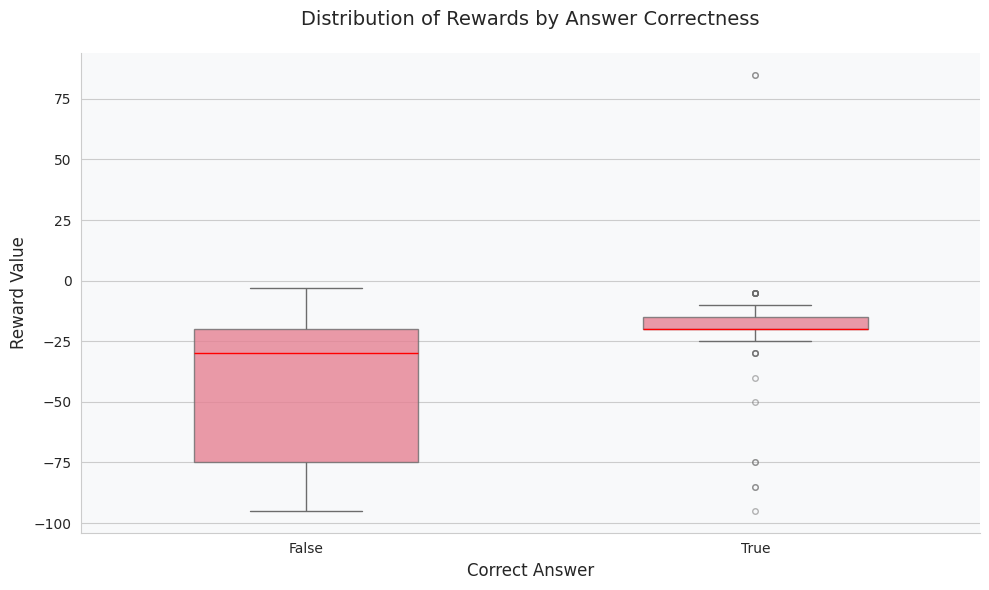

In [4]:
# Set the style
sns.set_style("whitegrid")
sns.set_palette("husl")

# Create figure
plt.figure(figsize=(10, 6), dpi=100)

# Create a boxplot with some customization, but WITHOUT the strip plot this time
ax = sns.boxplot(data=df, x='Correct', y='Reward', 
                 width=0.5,                    # Make boxes slightly narrower
                 fliersize=4,                  # Size of outlier points
                 flierprops={'alpha': 0.5},    # Make outliers semi-transparent
                 medianprops={'color': 'red'}, # Make median line red
                 boxprops={'alpha': 0.8})      # Slight transparency for boxes

# Customize the plot
plt.title('Distribution of Rewards by Answer Correctness', pad=20, fontsize=14)
plt.xlabel('Correct Answer', fontsize=12)
plt.ylabel('Reward Value', fontsize=12)

# Remove top and right spines
sns.despine()

# Add a subtle background color
ax.set_facecolor('#f8f9fa')

plt.tight_layout()
plt.show()